In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

In [2]:
ds = xr.open_dataset('tas_Amon_GISS-E2-R_abrupt4xCO2_r1i1p1_185001-200012.GLOBALavg.ANNavg.NODRIFT.nc')
T = ds.tas

ds_r = xr.open_dataset('rtmt_Amon_GISS-E2-R_abrupt4xCO2_r1i1p1_185001-200012.GLOBALavg.ANNavg.NODRIFT.nc')
rad = ds_r.rtmt
T

<xarray.DataArray 'tas' (time: 151)>
array([1.232007, 1.891933, 2.092581, 2.204403, 2.44694 , 2.588195, 2.635979,
       2.616414, 2.65712 , 2.596446, 2.622164, 2.627032, 2.576594, 2.61236 ,
       2.631769, 2.668008, 2.698555, 2.612511, 2.656885, 2.806991, 2.730003,
       2.694448, 2.78013 , 2.81618 , 2.789235, 2.77333 , 2.827091, 2.774798,
       2.945676, 2.904514, 2.856056, 2.906413, 2.877393, 2.782882, 2.789752,
       2.825769, 2.790469, 2.835374, 2.770328, 2.822598, 2.858761, 2.955968,
       3.001943, 2.972764, 2.964194, 2.92695 , 2.859077, 2.919166, 2.974877,
       3.079343, 3.062672, 3.002165, 2.984797, 2.963084, 2.9391  , 3.023319,
       3.114393, 3.133799, 3.062556, 3.011808, 2.985311, 3.103698, 3.044035,
       3.074905, 3.118246, 3.014877, 3.076108, 3.043944, 3.029774, 2.960386,
       2.973903, 2.990553, 3.076985, 3.133926, 3.134521, 3.092227, 3.094967,
       3.039438, 3.061107, 3.151858, 3.195022, 3.182755, 3.108375, 3.103261,
       3.128381, 3.109182, 3.175547, 3.

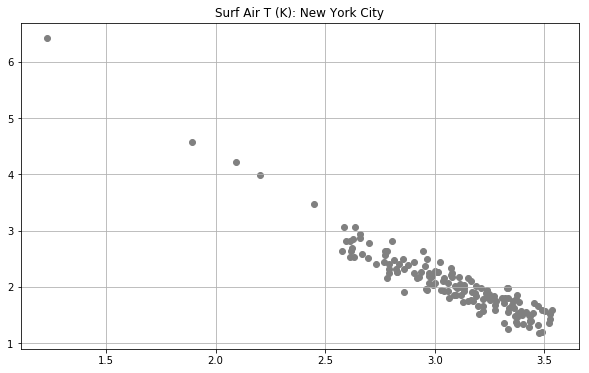

In [3]:
fig, ax = plt.subplots(figsize = (10,6))

ax.scatter(T, rad, c = 'grey')
#plt.plot(T_surf, tao_values)
ax.set_title('Surf Air T (K): New York City', fontsize = 12)
ax.set_xlabel('', fontsize = 12)
ax.grid()
#ax.set_xlim(time2.min(), time2.max());
#ax.set_ylim(-21, 20)
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
#ax.legend(['RE', 'RCE'], fontsize = 14)



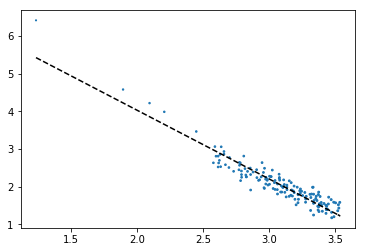

In [4]:
fit_j = np.polyfit(T, rad, 1)
fit_j

fit_fn_j = np.poly1d(fit_j) 
fit_fn_j

y_hat_j = fit_fn_j(T)

m_j,b_j = np.polyfit(T, rad, 1) 

plt.scatter(T, rad, T) ;
plt.plot(T, m_j*(T)+b_j, '--k') ;

In [5]:
m_j, b_j # m_j is alpha and b_j is F_t 

(-1.8251164551820138, 7.677559611477168)

In [7]:
Te = (-1*b_j)/m_j
Te # equilibrium temperature after the eventual adjustment of the ocean using the inferred forcing and climate sensitivity. 

4.206613550427666

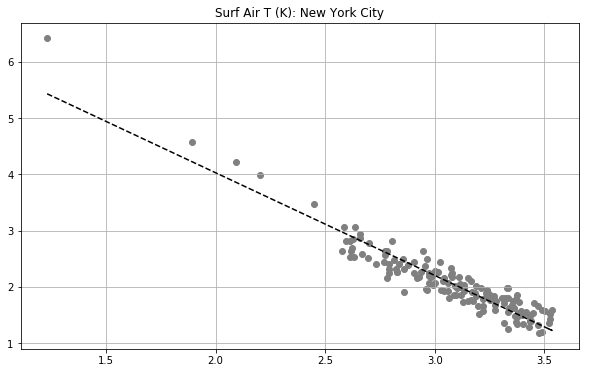

In [9]:
fig, ax = plt.subplots(figsize = (10,6))

ax.scatter(T, rad, c = 'grey')
ax.plot(T, m_j*(T)+b_j, '--k') ;
#plt.plot(T_surf, tao_values)
ax.set_title('Surf Air T (K): New York City', fontsize = 12)
ax.set_xlabel('', fontsize = 12)
ax.grid()

In [11]:
x = np.linspace(0, 3.519385, 100)
y = x*m_j + b_j
y

array([7.67755961, 7.61267792, 7.54779623, 7.48291454, 7.41803284,
       7.35315115, 7.28826946, 7.22338777, 7.15850608, 7.09362439,
       7.02874269, 6.963861  , 6.89897931, 6.83409762, 6.76921593,
       6.70433424, 6.63945254, 6.57457085, 6.50968916, 6.44480747,
       6.37992578, 6.31504409, 6.25016239, 6.1852807 , 6.12039901,
       6.05551732, 5.99063563, 5.92575394, 5.86087224, 5.79599055,
       5.73110886, 5.66622717, 5.60134548, 5.53646379, 5.47158209,
       5.4067004 , 5.34181871, 5.27693702, 5.21205533, 5.14717364,
       5.08229194, 5.01741025, 4.95252856, 4.88764687, 4.82276518,
       4.75788349, 4.69300179, 4.6281201 , 4.56323841, 4.49835672,
       4.43347503, 4.36859334, 4.30371164, 4.23882995, 4.17394826,
       4.10906657, 4.04418488, 3.97930319, 3.91442149, 3.8495398 ,
       3.78465811, 3.71977642, 3.65489473, 3.59001304, 3.52513134,
       3.46024965, 3.39536796, 3.33048627, 3.26560458, 3.20072289,
       3.13584119, 3.0709595 , 3.00607781, 2.94119612, 2.87631

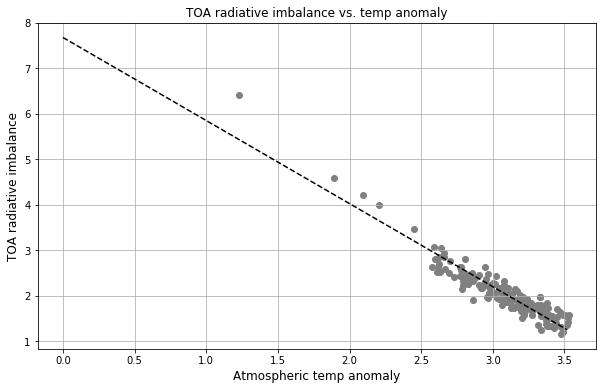

In [13]:
fig, ax = plt.subplots(figsize = (10,6))

ax.scatter(T, rad, c = 'grey')
ax.plot(x, y, '--k') ;
#plt.plot(T_surf, tao_values)
ax.set_title('TOA radiative imbalance vs. temp anomaly', fontsize = 12)
ax.set_xlabel('Atmospheric temp anomaly', fontsize = 12)
ax.set_ylabel('TOA radiative imbalance', fontsize = 12)
ax.grid()

In [14]:
#### Fraction of warming realized by the end of the first 150 years
T[-1]/Fe

<xarray.DataArray 'tas' ()>
array(0.836631)
Coordinates:
    time     float64 2e+03

#### 1b 

In [15]:
newFt = b_j/2 
newTe = (-1*newFt)/m_j
newTe

2.103306775213833

#### Question 2 

In [26]:
dsP = xr.open_dataset('pr_Amon_GISS-E2-R_abrupt4xCO2_r1i1p1_185001-200012.GLOBALavg.ANNavg.NODRIFT.nc')
P = dsP.pr 
P = P * 86400

T2 = ds.tas


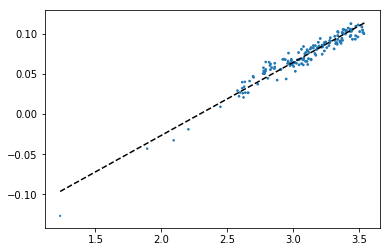

In [27]:
fit_j2 = np.polyfit(T2, P, 1)
fit_j2

fit_fn_j2 = np.poly1d(fit_j2) 
fit_fn_j2

y_hat_j2 = fit_fn_j2(T2)

m_j2,b_j2 = np.polyfit(T2, P, 1) 

plt.scatter(T2, P, T2) ;
plt.plot(T2, m_j2*(T2)+b_j2, '--k') ;

In [29]:
m_j2, b_j2 ## m_j2 is gamma and b_j2 is deltaP 

(0.09115961932460064, -0.20876161453961745)

### Question 3 

In [30]:
KH_To = 0.16e9 # Pa
To = 298 # K
T = 275 # K
C_H = 2400

In [31]:
KH_T = KH_To*np.exp(C_H*((1/To) - (1/T)))
KH_T

81580671.34411848

In [32]:
# calculate p_co2 
# given: p_co2 = KH_T * c
# c = 1.0e-6 
c = 28/KH_T
c

3.4321855334938533e-07

In [33]:
co2_atm = 280*(1/1e6) # 
T_oce = 275 # K
# calculate molar ratio ?

In [34]:
# the ratio of atmosphere to dissolved ocean CO2 can be expressed as a ratio of masses or equivalently as ratio of the number of molecules 

In [35]:
# moles of seawater?
# mass of seawater?
rho_sw = 1e3 # kg m-3
v_sw = 1.335e18 # m3
mass_sw = rho_sw * v_sw
mass_sw

1.335e+21

In [36]:
# now convert mass to moles by dividing by the molecular weight of water
molec_weight_h2o = 18/1000 #kg mole-1
moles_sw = mass_sw / molec_weight_h2o
moles_sw

7.416666666666667e+22

In [37]:
# to express atmospheric CO2 in moles, caluclate atmospheric mass (mass_a) using the hydrostatic relation and a surface pressure of 1000 hPa 
Po = 1e5 # sfc pressure
a_o = 6.371e6 # radius of Earth in m
g = 9.81 # ms-2
mass_a = (4*np.pi*(a_o**2)*Po)/g
mass_a

5.199433964421898e+18

In [38]:
# calculate N_A, the number of molecules in the atmosphere in moles 
n2_conc = 0.78
o2_conc = 0.21
ar_conc = 0.01
co2_conc = 280e-6

n2_mw = 28/1000 # g / mole 
o2_mw = 32/1000
ar_mw = 40/1000
co2_mw = 44/1000

In [39]:
N_a = mass_a / ((n2_conc*n2_mw) + (o2_conc*o2_mw) + (ar_conc*ar_mw) + (co2_conc*co2_mw))
N_a

1.7946211985860634e+20

In [40]:
# N_a is moles of of atmosphere
moles_a = N_a 

In [41]:
N_o_co2 = moles_sw * c # (p_co2/KH_T)
N_a_co2 = N_a * co2_conc
N_a_co2

5.024939356040977e+16

In [42]:
N_a_co2 + N_o_co2

7.570476960048918e+16

In [98]:
N_a_co2 / N_o_co2

1.974018905919608

#### 3c

In [43]:
2.1 * 280

588.0

In [44]:
2.1 * 400

840.0

In [45]:
840/2

420.0

#### Question 4

In [46]:
#a
((1365 - (1365*0.94))*0.7)*(1/4)

14.332500000000016